<a href="https://colab.research.google.com/github/shinnew9/llms_from_scratch/blob/main/jason_data_assessmentipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Necessary Package

### Open csv

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/R_/국내 미국회사및연구실/대학원졸업후_IT관련기업(인공지능)/2025상반기/UChicago/Dataset.csv')
# df

# Rename threat variables to descriptive names
threat_labels = {
    'SocietalThreat_1': 'Natural Disaster',
    'SocietalThreat_2': 'Famine',
    'SocietalThreat_3': 'Pollution',
    'SocietalThreat_4': 'Terrorist Attack',
    'SocietalThreat_5': 'Crime Surge',
    'SocietalThreat_6': 'Discrimination',
    'SocietalThreat_7': 'National Debt',
    'SocietalThreat_8': 'COVID-19 Surge',
    'SocietalThreat_9': 'Refugees Influx',
    'SocietalThreat_10': 'Illegal Immigration'
}

# Apply renaming
df_renamed = df.rename(columns=threat_labels)
df_renamed

,Age,Native,Education,Income,Religion,CT_1,CT_2,CT_3,CT_4,CT_5,...,Famine,Pollution,Terrorist Attack,Crime Surge,Discrimination,National Debt,COVID-19 Surge,Refugees Influx,Illegal Immigration,country
0,54,4,2,3.0,1,4,4,5,5,5,...,4,2,3,3,3,4,2,3,4,USA
1,72,4,1,2.0,1,6,5,4,5,5,...,3,1,5,5,4,5,4,5,4,USA
2,30,4,2,1.0,1,4,3,3,4,4,...,4,5,5,5,4,4,5,4,5,USA
3,75,4,1,2.0,1,4,4,4,4,4,...,5,5,5,5,5,5,5,5,5,USA
4,65,4,1,2.0,1,4,3,4,4,4,...,2,3,3,2,3,3,3,2,2,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8683,30,4,2,4.0,2,2,4,2,3,3,...,3,3,3,3,3,3,3,3,3,UAE
8684,18,4,1,1.0,1,3,2,4,2,7,...,5,4,4,3,5,5,3,2,5,Ethiopia
8685,19,4,1,NaN,1,5,1,2,6,3,...,1,1,1,2,1,1,1,4,5,Ethiopia
8686,21,4,1,1.0,1,3,2,1,3,7,...,5,5,5,2,2,5,5,5,5,Ethiopia


### 1.
A figure which visualizes the average level of concern for each threat, assembled in a way that the reader can clearly see which threats are more concerning, and which threats are least concerning.


<ipython-input-4-6e668425eaff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=renamed_threat_means.values, y=renamed_threat_means.index, palette='coolwarm')


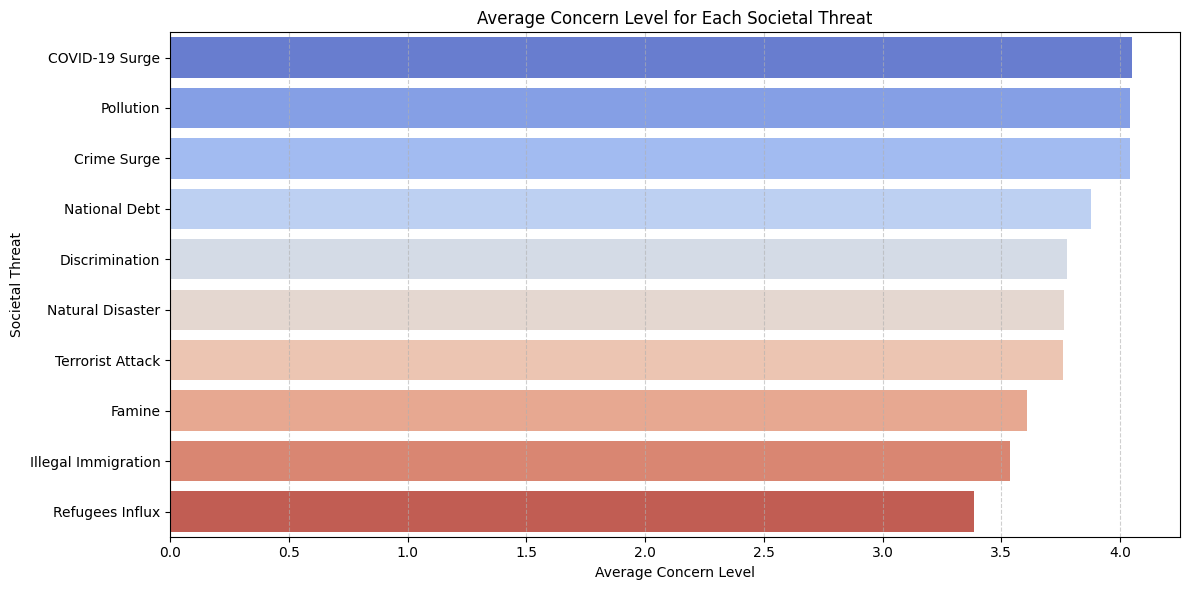

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mean values using new column names
renamed_threat_means = df_renamed[list(threat_labels.values())].mean().sort_values(ascending=False)

# Plot with renamed variables
plt.figure(figsize=(12, 6))
sns.barplot(x=renamed_threat_means.values, y=renamed_threat_means.index, palette='coolwarm')
plt.title("Average Concern Level for Each Societal Threat")
plt.xlabel("Average Concern Level")
plt.ylabel("Societal Threat")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Conclusion Note for 1: This plot visualized the average laevel of concern for each societal threast, helping to cleary compare which trehats aren perceived as more or less concerning across participants.

### 2.
To evaluate the internal consistency of the Cultural Tightness scale, I calculated Cronbach's alpha across its nine items. The resulting value of 0.85 suggests a high level of reliability, indicating that the items are measuring a coherent construct.

In [ ]:
ct_cols = [f'CT_{i}' for i in range(1, 10)]
ct_data = df_renamed[ct_cols]

# Calculate Cronbach's alpha
item_variances = ct_data.var(axis=0, ddof=1)
total_score = ct_data.sum(axis=1)
total_variance = total_score.var(ddof=1)
n_items = ct_data.shape[1]

cronbach_alpha = (n_items/(n_items-1)) * (1-(item_variances.sum()/total_variance))
print(cronbach_alpha)

0.8520589752776526


Conclusion Note for 2: Cronbach’s alpha was calculated to assess the internal consistency of the Cultural Tightness scale, yielding a value of 0.85 indicating strong reliability.

### 3.
A table which communicates the correlation between desire for cultural tightness and level of concern for each threat (there should be 10 correlations in this table, one for each threat variable).

In [ ]:
threat_columns = list(threat_labels.values())

# CT1~CT9 각각과 Threat 10개 각각 간 Pearson 상관계수 구하기
correlation_matrix = pd.DataFrame(index=ct_cols, columns=threat_columns)

for ct in ct_cols:
    for threat in threat_columns:
        correlation_matrix.loc[ct, threat] = df_renamed[ct].corr(df_renamed[threat])

# 결과 출력
correlation_matrix

,Natural Disaster,Famine,Pollution,Terrorist Attack,Crime Surge,Discrimination,National Debt,COVID-19 Surge,Refugees Influx,Illegal Immigration
CT_1,0.06272,0.051139,0.048493,0.025699,0.105364,0.002659,0.078355,0.056553,0.130921,0.130316
CT_2,0.047713,0.053215,0.044394,0.053286,0.096961,0.040445,0.069604,0.032427,0.126301,0.114604
CT_3,0.057256,0.074072,0.049906,0.014654,0.086298,0.048605,0.073473,0.067674,0.063812,0.057822
CT_4,0.098016,0.111216,0.109297,0.06487,0.140232,0.068098,0.122427,0.104444,0.142795,0.138472
CT_5,0.049191,0.049652,0.078961,0.01375,0.164835,0.084353,0.147074,0.072844,0.120734,0.106404
CT_6,0.069208,0.054675,0.078343,0.023077,0.161962,0.071315,0.129272,0.084192,0.140766,0.136123
CT_7,0.076415,0.093011,0.107923,0.047473,0.157694,0.07788,0.14413,0.088872,0.111604,0.125039
CT_8,0.037051,0.034047,0.059366,0.026861,0.119973,0.005261,0.099904,0.049121,0.125485,0.119114
CT_9,0.077246,0.087674,0.100027,0.045156,0.162282,0.068091,0.123418,0.092161,0.133164,0.122521


Conclusion Note for 3: This matrix reports the Pearson correlation coefficients between each Cultural Tightness item and each societal threat, allowing for detailed examination of item-specific associations.

### 4.
A written summary of a regression model which summarizes the association between concern about a rise of COVID-19 cases and desire of cultural tightness. In this summary, state the association's effect size and statistical significance.

A simple linear regression was conducted to examine the association between concern about a rise in COVID-19 cases and the desire for greater cultural tightness.
The results revealed a positive and statistically significant association (β = 0.099, p < 0.001).
However, the effect size was small, with only 1.1% of the variance in cultural tightness being explained by COVID-19 concern (R² = 0.011).

### 5.
A figure which shows the association between COVID-19 concern and desire for cultural tightness (e.g., a scatterplot) for three different countries.

<ipython-input-9-f0da97b4638e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CT_mean'] = df_filtered[[f'CT_{i}' for i in range(1, 10)]].mean(axis=1)


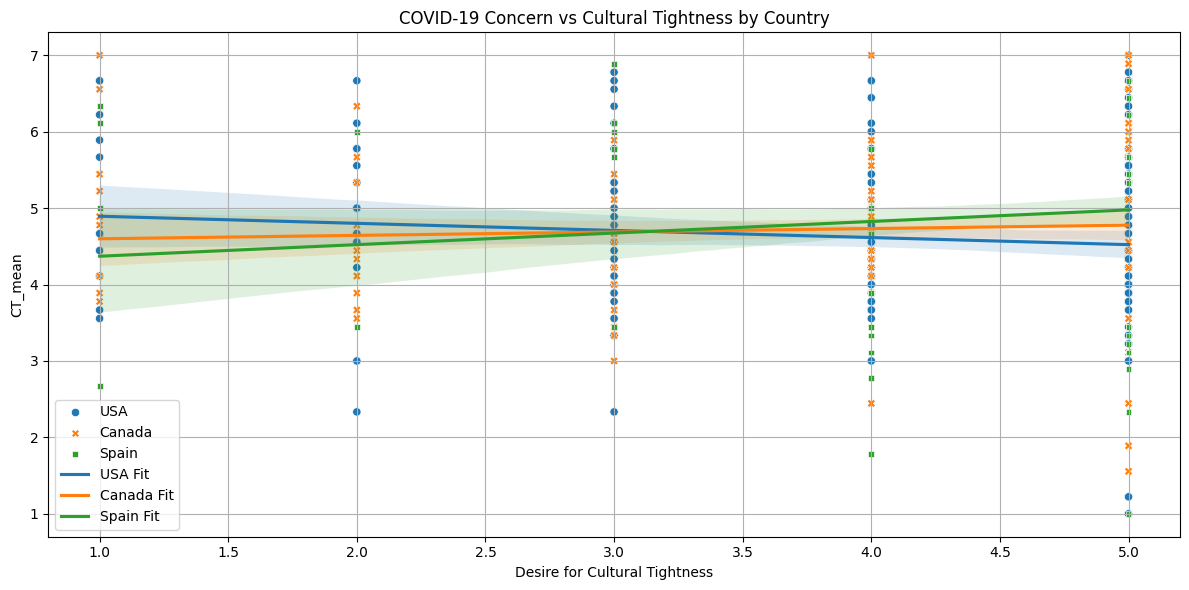

In [ ]:
# select three countires for visualization
countries = df_renamed['country'].dropna().unique()
selected_countries = countries[:3]  # Select first three countries (can be change)

# Filter the dataset for the selected countries
df_filtered = df_renamed[df_renamed['country'].isin(selected_countries)]

# Calculate CT_mean for the filtered DataFrame
# This line is added to calculate 'CT_mean' for the filtered data
df_filtered['CT_mean'] = df_filtered[[f'CT_{i}' for i in range(1, 10)]].mean(axis=1)


# Create scatterplots and regression lines for each country
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_filtered,
    x='COVID-19 Surge',
    y='CT_mean',
    hue='country',
    style='country'
)

# Add regression lines per country
for country in selected_countries:
    sns.regplot(
        data = df_filtered[df_filtered['country'] == country],
        x='COVID-19 Surge',
        y='CT_mean',
        scatter=False,
        label=f"{country} Fit"
    )

# Customize the plot
plt.title('COVID-19 Concern vs Cultural Tightness by Country')
plt.xlabel('Concern about COVID-19 Surge')
plt.xlabel('Desire for Cultural Tightness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Conclusion Note for 5: This figure illustrates how the association between concern about COVID-19 surge and desire for cultural tightness varies across three different countries, with individual scatter plots and regression lines.